In [222]:
#importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
from Database.py import Airbnbs, Hosts, Airbnb_Details, Neighbourhoods, creating_engine, creating_session, closing_session

ImportError: cannot import name 'Airbnbs' from 'Database' (c:\Users\SANTIAGO\Documents\universidad\Airbnb_Data_Analysis\Airbnb_Data_Analysis\Database.py)

In [194]:
"""#Creating engine
engine1 = creating_engine()

#Creating session
session1 = creating_session(engine1)"""

'#Creating engine\nengine1 = creating_engine()\n\n#Creating session\nsession1 = creating_session(engine1)'

## Leemos el dataset

In [195]:
df_airbnb=pd.read_csv("Airbnb_Open_Data.csv")
df_airbnb.head(2)

C:\Users\SANTIAGO\AppData\Local\Temp\ipykernel_31936\3544423338.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb=pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


## ¿Qué tipo de dato son las variables del conjunto de datos?

In [196]:
df_airbnb.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [197]:
(
    df_airbnb
    .dtypes
    .value_counts()
)

object     15
float64     9
int64       2
Name: count, dtype: int64

##  ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [198]:
df_airbnb.shape

(102599, 26)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [199]:
(
    df_airbnb
    .isnull()
    .any()
)

id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [200]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

## ¿Cuál es la proporción de valores nulos por cada variable? 

c:\Users\SANTIAGO\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


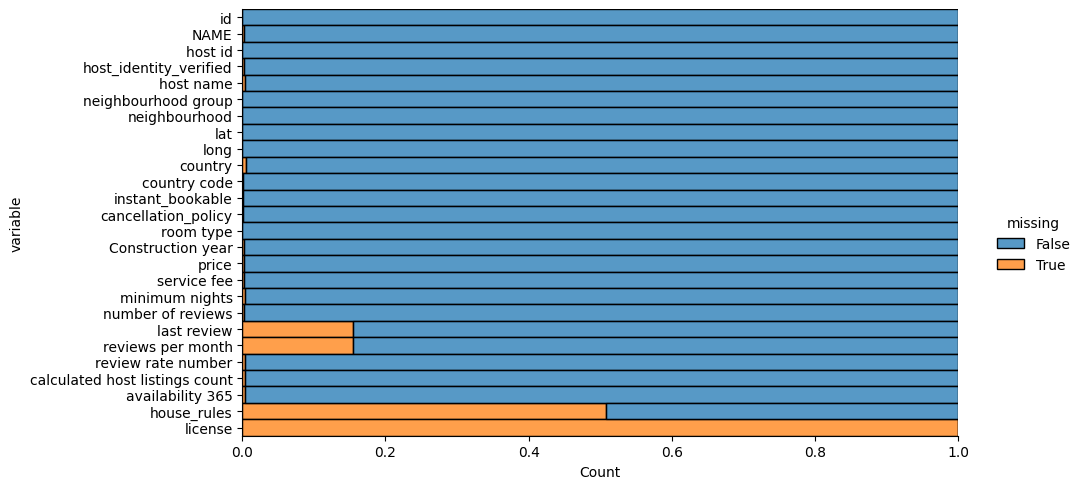

In [201]:
(
    df_airbnb
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

We can certainly see that the column "license" has no sense to keep it, so we proceed to delete it, and it's also known that all the information comes from the USA, so the columns "country" and "country code" don't provide any value. 

In [202]:
df_airbnb.drop(["license", "country", "country code"], axis=1, inplace=True)
print(df_airbnb.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')


## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [203]:
(
    df_airbnb
    .isnull()
    .sum()
)

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [205]:
df_airbnb2 = (
    df_airbnb
    .dropna()
)

df_airbnb2.count()

id                                39763
NAME                              39763
host id                           39763
host_identity_verified            39763
host name                         39763
neighbourhood group               39763
neighbourhood                     39763
lat                               39763
long                              39763
instant_bookable                  39763
cancellation_policy               39763
room type                         39763
Construction year                 39763
price                             39763
service fee                       39763
minimum nights                    39763
number of reviews                 39763
last review                       39763
reviews per month                 39763
review rate number                39763
calculated host listings count    39763
availability 365                  39763
house_rules                       39763
dtype: int64

# Conteos y proporciones
## Analisis descriptivo

## Solo las numericas

In [206]:
df_airbnb.describe(include=[np.number])

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [207]:
## Solo categoricas

In [208]:
df_airbnb.describe(include=object)

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules
count,102349,102310,102193,102570,102583,102494,102523,102599,102352,102326,86706,50468
unique,61281,2,13190,7,224,2,3,4,1151,231,2477,1976
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,False,moderate,Entire home/apt,$206,$41,6/23/2019,#NAME?
freq,33,51200,881,43792,7937,51474,34343,53701,137,526,2443,2712


In [209]:
#Empezamos a segmentar la info para crear el datawarehouse
host_table = df_airbnb[["host id", "host name", "host_identity_verified"]]
host_table.head(2)

,host id,host name,host_identity_verified
0,80014485718,Madaline,unconfirmed
1,52335172823,Jenna,verified


In [210]:
neighbourhood_table = df_airbnb[["neighbourhood group", "neighbourhood", "lat", "long"]]
neighbourhood_table.insert(0, "neighbourhood_id", range(1, 1 + len(neighbourhood_table)))
df_airbnb["neighbour_id"] = neighbourhood_table["neighbourhood_id"]
neighbourhood_table.head(2)

,neighbourhood_id,neighbourhood group,neighbourhood,lat,long
0,1,Brooklyn,Kensington,40.64749,-73.97237
1,2,Manhattan,Midtown,40.75362,-73.98377


In [211]:
airbnb_detail = df_airbnb[
    ["id", "NAME", "instant_bookable", 
     "cancellation_policy", "room type", "Construction year", 
     "price", "service fee", "minimum nights", "number of reviews", 
     "last review", "reviews per month", "review rate number", "calculated host listings count", 
     "availability 365", "house_rules"]]

airbnb_detail.head(2)

,id,NAME,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...


In [212]:
#Delete the following columns ince we already set up diferent tables to save all the information related with neighbourhoods and hots
df_airbnb.drop(["neighbourhood group", "neighbourhood", "lat", "long"], axis=1, inplace=True)
df_airbnb.drop(["host name", "host_identity_verified"], axis=1, inplace=True)
df_airbnb.drop(["NAME", "instant_bookable", 
     "cancellation_policy", "room type", "Construction year", 
     "price", "service fee", "minimum nights", "number of reviews", 
     "last review", "reviews per month", "review rate number", "calculated host listings count", 
     "availability 365", "house_rules"], axis=1, inplace=True)

In [213]:
renaming_columns = {
    "id" : "airbnb_id",
}
df_airbnb.rename(columns=renaming_columns, inplace=True)
df_airbnb.head(2)

,airbnb_id,host id,neighbour_id
0,1001254,80014485718,1
1,1002102,52335172823,2


In [216]:
airbnb_detail.columns

Index(['id', 'NAME', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

In [218]:
neighbourhood_table.columns

Index(['neighbourhood_id', 'neighbourhood group', 'neighbourhood', 'lat',
       'long'],
      dtype='object')

In [217]:
host_table.columns

Index(['host id', 'host name', 'host_identity_verified'], dtype='object')

In [219]:
df_airbnb.columns

Index(['airbnb_id', 'host id', 'neighbour_id'], dtype='object')